In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers import split_WoS_category

In [19]:
sample_n = 5

In [20]:
df = pd.read_csv('output/shared_citations.csv')
df['WoS Categories'] = df['WoS Categories'].apply(split_WoS_category)
df_exploded = df.explode('WoS Categories')
category_counts = pd.DataFrame(df_exploded['WoS Categories'].value_counts())
category_counts = pd.DataFrame(category_counts).reset_index()
category_counts.sort_values(by='count', ascending=False, inplace=True)
category_counts.sort_values(by='count', ascending=True, inplace=True)

Text(0.5, 0, 'number of publications')

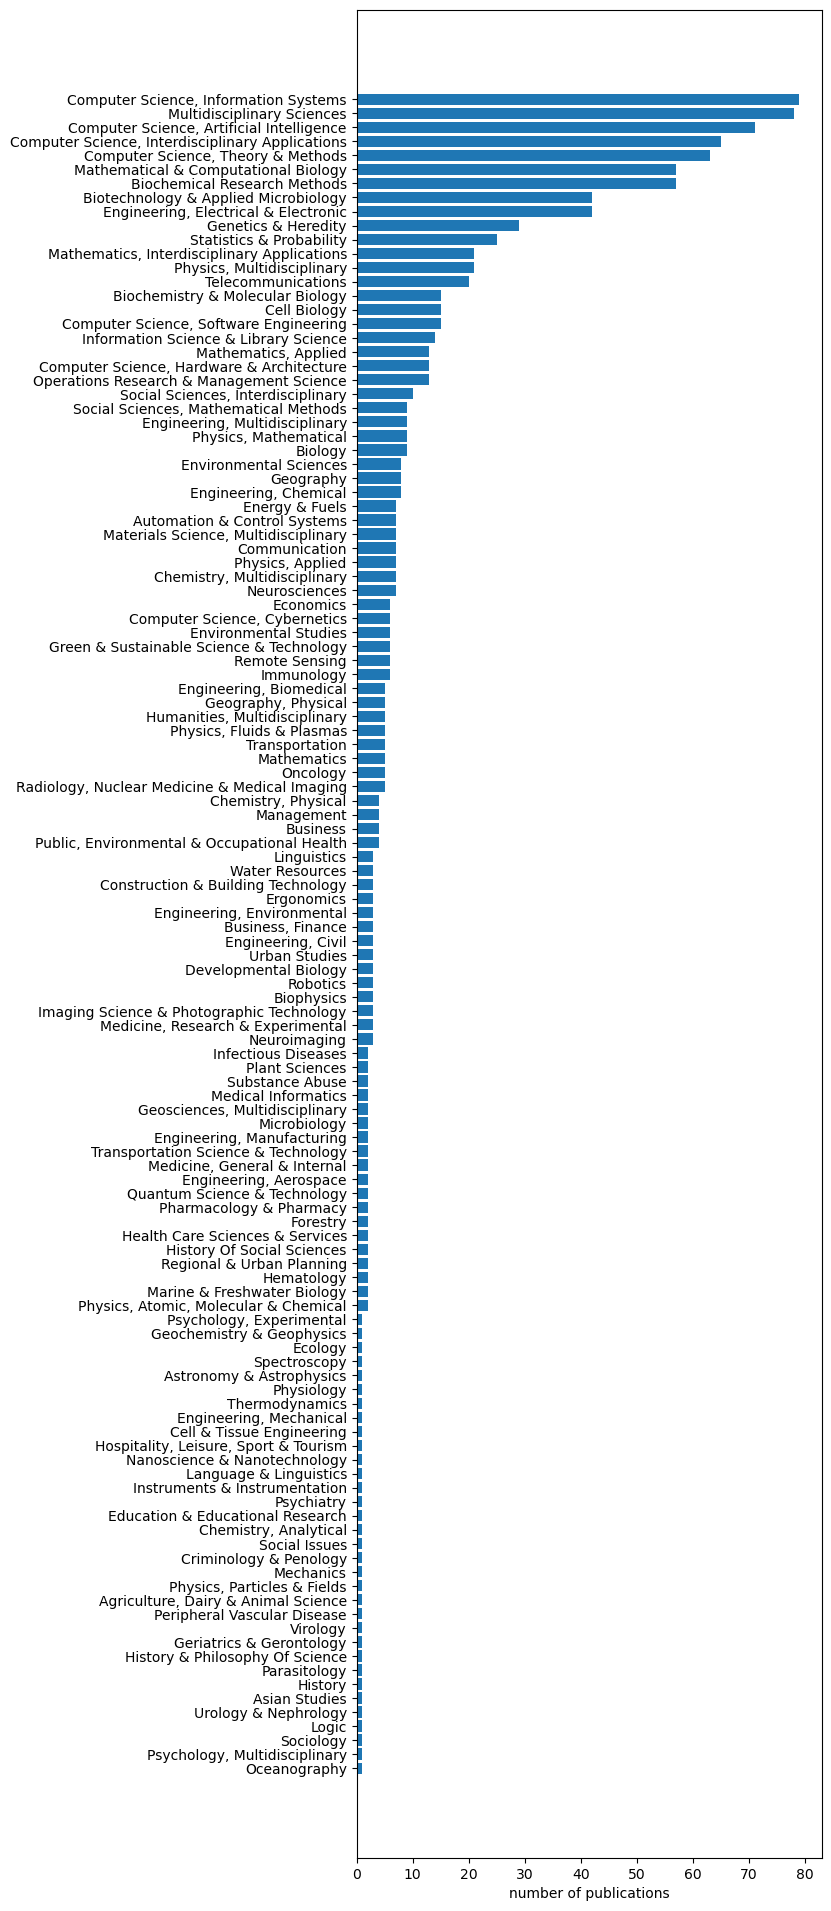

In [21]:
plt.figure(figsize=(6, 24))
plt.barh(y=list(category_counts['WoS Categories']), width=category_counts['count'])
plt.xlabel("number of publications")

In [22]:
category_counts

,WoS Categories,count
119,Oceanography,1
111,"Psychology, Multidisciplinary",1
105,Sociology,1
107,Logic,1
108,Urology & Nephrology,1
...,...,...
4,"Computer Science, Theory & Methods",63
3,"Computer Science, Interdisciplinary Applications",65
2,"Computer Science, Artificial Intelligence",71
1,Multidisciplinary Sciences,78


In [23]:
sample = []
category_name_l = []

for i in range(0, len(category_counts)):
    category_name = category_counts['WoS Categories'][i]
    
    if len(df_exploded.loc[(df_exploded['WoS Categories'] == category_name)]) >= sample_n:
        category_name_l.extend([category_name] * sample_n)
        sample.append(df_exploded.loc[(df_exploded['WoS Categories'] == category_name)].sample(n=sample_n, random_state=42))
    else:
        sample.append(df_exploded.loc[(df_exploded['WoS Categories'] == category_name)])
        temp_len = len(df_exploded.loc[(df_exploded['WoS Categories'] == category_name)])
        category_name_l.extend([category_name] * temp_len)

In [24]:
sample_df = pd.concat(sample)
sample_df['Category Sampling Basis'] = category_name_l

In [25]:
sample_df.shape

(379, 73)

In [32]:
len(sample_df['UT (Unique WOS ID)'].unique())

272

In [27]:
sample_df.shape

(379, 73)

In [28]:
sample_df.to_csv('output/sample_all_pub.csv', index=False)